# Ungraded Lab: Exploring Convolutions

In this lab, you will explore how convolutions work by creating a basic convolution on a 2D grayscale image. First, you will load the image by taking the ascent image from SciPy. It's a nice, built-in picture with lots of angles and lines.

In [6]:
from scipy.datasets import ascent

In [7]:
ascent_image=ascent()

In [8]:
import matplotlib.pyplot as plt

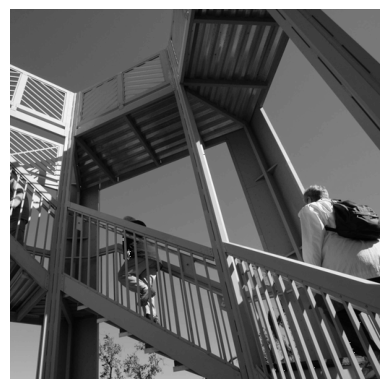

In [9]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

The image is stored as a numpy array so you can create the transformed image by first copying that array. You can also get the dimensions of the image so you can loop over it later.

In [44]:
import numpy as np

image_transformed = np.copy(ascent_image)

In [45]:
sizex=image_transformed.shape[0]
sizey=image_transformed.shape[1]
sizex,sizey

(512, 512)

# filter 3x3 array

In [46]:
# experiment with different values and see the effect
filter1=[[0,1,0],[1,-4,1],[0,1,0]]
filter2=[[-1,-2,-1],[0,0,0],[1,2,1]]
filter3=[[-1,0,1],[-2,0,2],[-1,0,1]]
# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you'll load the new value into the transformed image.

In [47]:
filter=filter1
for x in range(1,sizex-1):
    for y in range(1,sizey-1):
        convolution = 0.0
        convolution = convolution + (ascent_image[x-1,y-1] * filter[0][0])
        convolution = convolution + (ascent_image[x-1,y] * filter[0][1])
        convolution = convolution + (ascent_image[x-1,y+1] * filter[0][2])
        convolution = convolution + (ascent_image[x,y-1] * filter[1][0])
        convolution = convolution + (ascent_image[x,y] * filter[1][1])
        convolution = convolution + (ascent_image[x,y+1] * filter[1][2])
        convolution = convolution + (ascent_image[x+1,y-1] * filter[2][0])
        convolution = convolution + (ascent_image[x+1,y] * filter[2][1])
        convolution = convolution + (ascent_image[x+1,y+1] * filter[2][2])
        
        convolution=convolution*weight

        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        image_transformed[x,y]=convolution

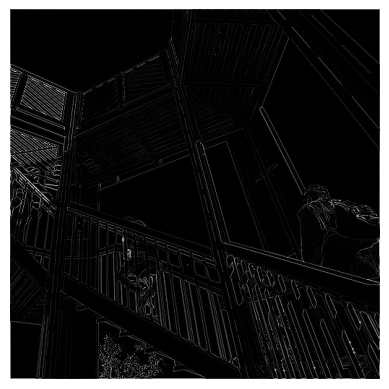

In [48]:
plt.gray()
plt.grid(False)
plt.axis('off')
plt.imshow(image_transformed)
plt.show()

# effect of max pooling

The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

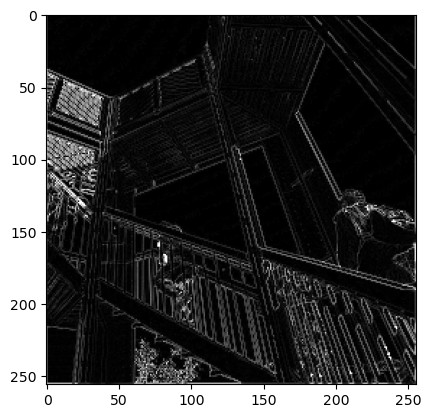

In [49]:
new_x=int(sizex/2)
new_y=int(sizey/2)

newImage=np.zeros((new_x,new_y))

#Iterate over the imange
for x in range(0,sizex,2):
    for y in range(0,sizey,2):
        # store all the pixesl value in the (2,2) pool
        pixels=[]
        pixels.append(image_transformed[x,y])
        pixels.append(image_transformed[x+1,y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1,y+1])

        newImage[int(x/2),int(y/2)]= max(pixels)
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()

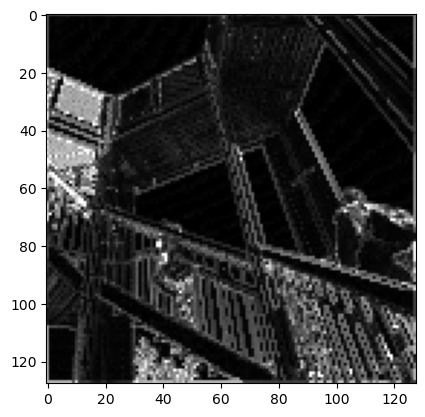

In [55]:
sizex=newImage.shape[0]
sizey=newImage.shape[1]
new_x=int(sizex/2)
new_y=int(sizey/2)

newImage2=np.zeros((new_x,new_y))

#Iterate over the imange
for x in range(0,sizex,2):
    for y in range(0,sizey,2):
        # store all the pixesl value in the (2,2) pool
        pixels=[]
        pixels.append(newImage[x,y])
        pixels.append(newImage[x+1,y])
        pixels.append(newImage[x,y+1])
        pixels.append(newImage[x+1,y+1])
        
        newImage2[int(x/2),int(y/2)]= max(pixels)
plt.gray()
plt.grid(False)
plt.imshow(newImage2)
plt.show()

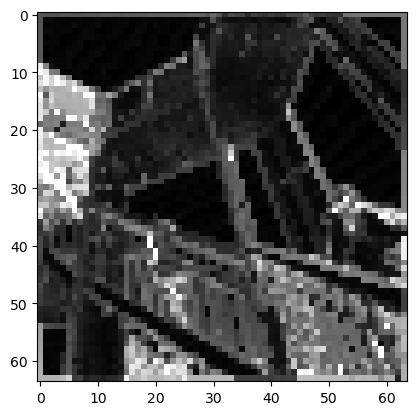

In [56]:
sizex=newImage2.shape[0]
sizey=newImage2.shape[1]
new_x=int(sizex/2)
new_y=int(sizey/2)

newImage3=np.zeros((new_x,new_y))

#Iterate over the imange
for x in range(0,sizex,2):
    for y in range(0,sizey,2):
        # store all the pixesl value in the (2,2) pool
        pixels=[]
        pixels.append(newImage2[x,y])
        pixels.append(newImage2[x+1,y])
        pixels.append(newImage2[x,y+1])
        pixels.append(newImage2[x+1,y+1])
        
        newImage3[int(x/2),int(y/2)]= max(pixels)
plt.gray()
plt.grid(False)
plt.imshow(newImage3)
plt.show()